# Maps

  > **3 Maps plotted:**<br>
    - Data available by location<br>
    - Price per square meter by location<br>
    - Price per square meter range by location <br>

In [1]:
import pandas as pd
import geopandas as gpd
import json
from shapely.geometry import shape
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx
from matplotlib.colors import ListedColormap

In [2]:
df=pd.read_csv('barris-barrios.csv',sep=';')

In [3]:
df.head()

,Codigo distrito-barrio,Nombre,Codigo distrito,Codigo barrio,Areas de barrios,geo_point_2d,geo_shape
0,93,LA CREU COBERTA,9,3,3.748875e+05,"39.45082750748332, -0.3853982961775011","{""coordinates"": [[[-0.3812388903732512, 39.454..."
1,95,CAMI REAL,9,5,1.477502e+06,"39.44492338630296, -0.39555042391499123","{""coordinates"": [[[-0.39830433723075587, 39.45..."
2,106,LA PUNTA,10,6,NaN,"39.4414756787921, -0.3494480667451268","{""coordinates"": [[[-0.3360548430672957, 39.426..."
3,181,BENIMAMET,18,1,NaN,"39.50126515665228, -0.42214469894626794","{""coordinates"": [[[-0.4265075268247919, 39.494..."
4,153,SANT LLORENS,15,3,NaN,"39.49635509681184, -0.36282126402044845","{""coordinates"": [[[-0.3576153239265151, 39.494..."


In [4]:
df2=pd.read_csv('data.csv')
average_prices_loc=pd.DataFrame(df2.groupby('Location').agg(n_offers=('Location','count'),
                                                           Price=('Price','mean'),
                                                           Surface=('Surface','mean'),
                                                          n_rooms=('Rooms','mean'),
                                                           n_bathrooms=('Bathrooms','mean'))).reset_index()
average_prices_loc['Ratio_price_surf']=average_prices_loc['Price']/average_prices_loc['Surface']
def location_price_grouping(x):
    if x <16:
        return '<16 €/m²'
    elif 16<=x<19:
        return '16-19 €/m²'
    elif 19<=x<22:
        return '19-22 €/m²'
    else:
        return '>22 €/m²'
    
average_prices_loc['Price_location']=average_prices_loc['Ratio_price_surf'].apply(lambda x: location_price_grouping(x))

In [5]:
average_prices_loc.head()

,Location,n_offers,Price,Surface,n_rooms,n_bathrooms,Ratio_price_surf,Price_location
0,Aiora,17,1546.470588,82.823529,2.588235,1.235294,18.671875,16-19 €/m²
1,Albors,9,1647.777778,104.777778,2.888889,1.777778,15.726405,<16 €/m²
2,Arrancapins,28,1653.571429,106.964286,2.714286,1.750000,15.459098,<16 €/m²
3,Benicalap,6,1583.333333,86.833333,2.333333,1.500000,18.234165,16-19 €/m²
4,Beniferri,2,1497.500000,70.500000,1.500000,1.500000,21.241135,19-22 €/m²


In [6]:
average_prices_loc['Location']=average_prices_loc['Location'].apply(lambda x:x.upper())
loc1=df['Nombre'].unique()
loc2=average_prices_loc['Location'].unique()
i=0
diff_name=[]
for loc in loc2:
    if loc in loc1:
        i+=1
        print(i)
    else:
        diff_name.append(loc)
        print(loc)
    print('-'*20)

1
--------------------
2
--------------------
3
--------------------
4
--------------------
5
--------------------
6
--------------------
BENIMÀMET
--------------------
BETERÓ
--------------------
7
--------------------
CAMÍ FONDO
--------------------
CAMÍ REAL
--------------------
8
--------------------
CIUTAT JARDÍ
--------------------
CIUTAT UNIVERSITÀRIA
--------------------
CIUTAT DE LES ARTS I DE LES CIÈNCIES
--------------------
EL BOTÀNIC
--------------------
EL CABANYAL-EL CANYAMELAR
--------------------
9
--------------------
10
--------------------
11
--------------------
12
--------------------
13
--------------------
14
--------------------
15
--------------------
16
--------------------
EXPOSICIÓ
--------------------
17
--------------------
18
--------------------
GRAN VIA
--------------------
19
--------------------
20
--------------------
21
--------------------
22
--------------------
L'OLIVERETA
--------------------
LA BEGA BAIXA
--------------------
23
--------------

In [7]:
print(loc1)


['LA CREU COBERTA' 'CAMI REAL' 'LA PUNTA' 'BENIMAMET' 'SANT LLORENS'
 'CIUTAT FALLERA' 'NOU MOLES' 'LA LLUM' 'LA MALVA-ROSA' 'MORVEDRE'
 'CAMPANAR' 'EL CARME' 'CIUTAT UNIVERSITARIA' 'BETERO' 'MESTALLA'
 'LA XEREA' 'ALBORS' 'ARRANCAPINS' 'LA ROQUETA' 'LA GRAN VIA'
 'LA CREU DEL GRAU' 'SANT ISIDRE' 'MALILLA' 'BENICALAP' 'LA PETXINA'
 'PENYA-ROJA' 'FAITANAR' 'PINEDO' "CASTELLAR-L'OLIVERAL"
 "EL FORN D'ALCEDO" 'AIORA' 'NA ROVELLA' 'FAVARA' "L'HORT DE SENABRE"
 'NATZARET' 'LA FONTETA S.LLUIS' 'CIUTAT JARDI' 'CAMI DE VERA' 'EL PALMAR'
 'EL PERELLONET' 'VARA DE QUART' 'SOTERNES' 'LA FONTSANTA' 'EL BOTANIC'
 'BORBOTO' 'BENIFARAIG' 'TORREFIEL' 'TORMOS' 'BENIMACLET' 'TRINITAT'
 'CABANYAL-CANYAMELAR' 'EL MERCAT' 'EL PLA DEL REMEI' "L'ILLA PERDUDA"
 'TRES FORQUES' 'PATRAIX' 'LA RAIOSA' 'POBLE NOU'
 'CIUTAT DE LES ARTS I DE LES CIENCIES' 'LA TORRE' 'SANT FRANCESC'
 'ELS ORRIOLS' 'LA SEU' 'MONTOLIVET' 'MAHUELLA-TAULADELLA' 'MASSARROJOS'
 'SANT PAU' 'JAUME ROIG' 'SANT MARCEL.LI' "L'AMISTAT" 'EL GRAU'

In [8]:
change_names={}
for name in diff_name:
    change_names[name]=input(name)

BENIMÀMETBENIMAMET
BETERÓBETERO
CAMÍ FONDOCAMI FONDO
CAMÍ REALCAMI REAL
CIUTAT JARDÍCIUTAT JARDI
CIUTAT UNIVERSITÀRIACIUTAT UNIVERSITARIA
CIUTAT DE LES ARTS I DE LES CIÈNCIESCIUTAT DE LES ARTS I DE LES CIENCIES
EL BOTÀNICEL BOTANIC
EL CABANYAL-EL CANYAMELARCABANYAL-CANYAMELAR
EXPOSICIÓEXPOSICIO
GRAN VIALA GRAN VIA
L'OLIVERETALA FONTSANTA
LA BEGA BAIXALA VEGA BAIXA
LA FONTSANTA-TRES FORQUESTRES FORQUES
ORRIOLSELS ORRIOLS
SANT LLORENÇSANT LLORENS
SANT MARCEL·LÍSANT MARCEL.LI


In [18]:
average_prices_loc['Location'].replace(change_names,inplace=True)
loc2=average_prices_loc['Location'].unique()
i=0
diff_name=[]
for loc in loc2:
    if loc in loc1:
        i+=1
        print(i)
    else:
        diff_name.append(loc)
        print(loc)
    print('-'*20)

1
--------------------
2
--------------------
3
--------------------
4
--------------------
5
--------------------
6
--------------------
7
--------------------
8
--------------------
9
--------------------
10
--------------------
11
--------------------
12
--------------------
13
--------------------
14
--------------------
15
--------------------
16
--------------------
17
--------------------
18
--------------------
19
--------------------
20
--------------------
21
--------------------
22
--------------------
23
--------------------
24
--------------------
25
--------------------
26
--------------------
27
--------------------
28
--------------------
29
--------------------
30
--------------------
31
--------------------
32
--------------------
33
--------------------
34
--------------------
35
--------------------
36
--------------------
37
--------------------
38
--------------------
39
--------------------
40
--------------------
41
--------------------
42
--------------------
4

In [10]:
df_final=df.merge(average_prices_loc,left_on='Nombre',right_on='Location',how='left')
df_final.head()

,Codigo distrito-barrio,Nombre,Codigo distrito,Codigo barrio,Areas de barrios,geo_point_2d,geo_shape,Location,n_offers,Price,Surface,n_rooms,n_bathrooms,Ratio_price_surf,Price_location
0,93,LA CREU COBERTA,9,3,3.748875e+05,"39.45082750748332, -0.3853982961775011","{""coordinates"": [[[-0.3812388903732512, 39.454...",LA CREU COBERTA,2.0,1535.0000,160.5000,3.0,2.000,9.563863,<16 €/m²
1,95,CAMI REAL,9,5,1.477502e+06,"39.44492338630296, -0.39555042391499123","{""coordinates"": [[[-0.39830433723075587, 39.45...",CAMI REAL,4.0,1387.5000,99.2500,2.5,1.750,13.979849,<16 €/m²
2,106,LA PUNTA,10,6,NaN,"39.4414756787921, -0.3494480667451268","{""coordinates"": [[[-0.3360548430672957, 39.426...",LA PUNTA,16.0,1627.8125,85.9375,2.5,1.625,18.941818,16-19 €/m²
3,181,BENIMAMET,18,1,NaN,"39.50126515665228, -0.42214469894626794","{""coordinates"": [[[-0.4265075268247919, 39.494...",BENIMAMET,1.0,2800.0000,178.0000,6.0,2.000,15.730337,<16 €/m²
4,153,SANT LLORENS,15,3,NaN,"39.49635509681184, -0.36282126402044845","{""coordinates"": [[[-0.3576153239265151, 39.494...",SANT LLORENS,1.0,1350.0000,89.0000,2.0,1.000,15.168539,<16 €/m²


In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo distrito-barrio  88 non-null     int64  
 1   Nombre                  88 non-null     object 
 2   Codigo distrito         88 non-null     int64  
 3   Codigo barrio           88 non-null     int64  
 4   Areas de barrios        56 non-null     float64
 5   geo_point_2d            88 non-null     object 
 6   geo_shape               88 non-null     object 
 7   Location                72 non-null     object 
 8   n_offers                72 non-null     float64
 9   Price                   72 non-null     float64
 10  Surface                 72 non-null     float64
 11  n_rooms                 72 non-null     float64
 12  n_bathrooms             72 non-null     float64
 13  Ratio_price_surf        72 non-null     float64
 14  Price_location          72 non-null     obje

In [12]:
def data_available(x):
    if x>=5:
        return 'Data with 5+ offers'
    elif x<5:
        return 'Few Data'
    else:
        return 'No data'

df_final['Data_available']=df_final['n_offers'].apply(lambda x: data_available(x))

def data_5(x):
    if x.get('n_offers', 0) >= 5:
        return x['Ratio_price_surf']
    else:
        return np.nan
df_final['data_5']=df_final.apply(lambda x: data_5(x),axis=1)

def data_5_cat(x):
    if x.get('n_offers', 0) >= 5:
        return x['Price_location']
    else:
        return np.nan
df_final['Price_cat']=df_final.apply(lambda x: data_5_cat(x),axis=1)

In [13]:
#-------------------------------------------------

In [14]:
df_final['geometry'] = df_final['geo_shape'].apply(lambda x: shape(json.loads(x)))

gdf = gpd.GeoDataFrame(df_final, geometry='geometry')

gdf.set_crs(epsg=4326, inplace=True)

gdf.head()

,Codigo distrito-barrio,Nombre,Codigo distrito,Codigo barrio,Areas de barrios,geo_point_2d,geo_shape,Location,n_offers,Price,Surface,n_rooms,n_bathrooms,Ratio_price_surf,Price_location,Data_available,data_5,Price_cat,geometry
0,93,LA CREU COBERTA,9,3,3.748875e+05,"39.45082750748332, -0.3853982961775011","{""coordinates"": [[[-0.3812388903732512, 39.454...",LA CREU COBERTA,2.0,1535.0000,160.5000,3.0,2.000,9.563863,<16 €/m²,Few Data,NaN,NaN,"POLYGON ((-0.38124 39.45463, -0.38281 39.44951..."
1,95,CAMI REAL,9,5,1.477502e+06,"39.44492338630296, -0.39555042391499123","{""coordinates"": [[[-0.39830433723075587, 39.45...",CAMI REAL,4.0,1387.5000,99.2500,2.5,1.750,13.979849,<16 €/m²,Few Data,NaN,NaN,"POLYGON ((-0.3983 39.45458, -0.39746 39.45393,..."
2,106,LA PUNTA,10,6,NaN,"39.4414756787921, -0.3494480667451268","{""coordinates"": [[[-0.3360548430672957, 39.426...",LA PUNTA,16.0,1627.8125,85.9375,2.5,1.625,18.941818,16-19 €/m²,Data with 5+ offers,18.941818,16-19 €/m²,"POLYGON ((-0.33605 39.42634, -0.33685 39.42636..."
3,181,BENIMAMET,18,1,NaN,"39.50126515665228, -0.42214469894626794","{""coordinates"": [[[-0.4265075268247919, 39.494...",BENIMAMET,1.0,2800.0000,178.0000,6.0,2.000,15.730337,<16 €/m²,Few Data,NaN,NaN,"POLYGON ((-0.42651 39.495, -0.42653 39.49506, ..."
4,153,SANT LLORENS,15,3,NaN,"39.49635509681184, -0.36282126402044845","{""coordinates"": [[[-0.3576153239265151, 39.494...",SANT LLORENS,1.0,1350.0000,89.0000,2.0,1.000,15.168539,<16 €/m²,Few Data,NaN,NaN,"POLYGON ((-0.35762 39.4941, -0.35762 39.49409,..."


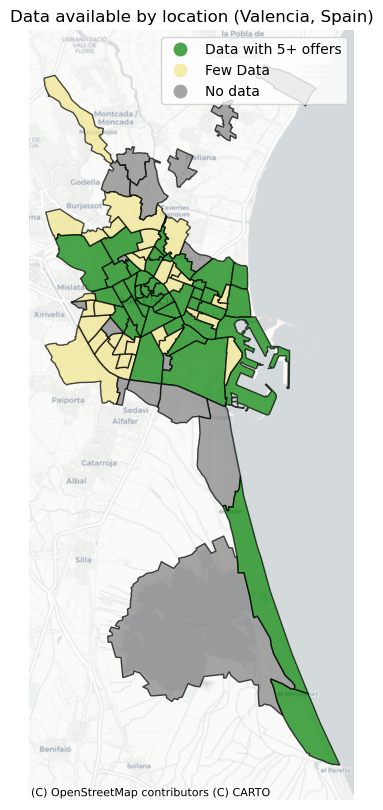

In [35]:
cmap = ListedColormap(['green','khaki','grey'])
ax=gdf.plot(figsize=(5,10),column="Data_available", legend=True, edgecolor="k",cmap=cmap,alpha=0.7)
ax.set_title('Data available by location (Valencia, Spain)')
cx.add_basemap(ax,crs=gdf.crs,source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.savefig('map_data_available.png')

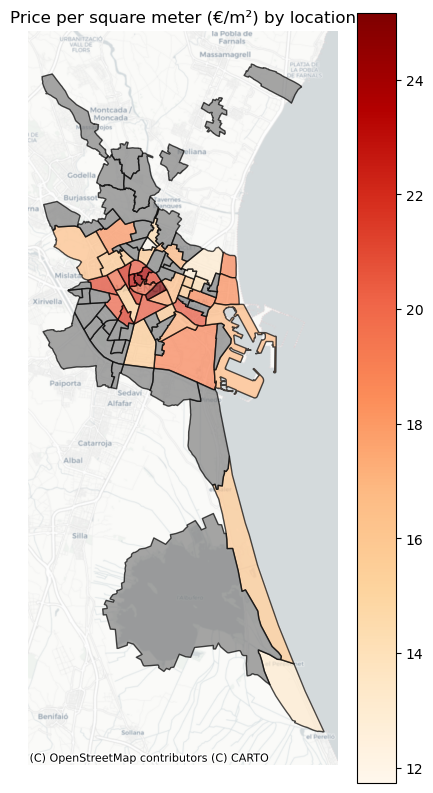

In [36]:

missing_kwds=dict(color='grey',label='Not enough data')
ax=gdf.plot(figsize=(5,10),column="data_5",cmap="OrRd", edgecolor="k", legend=True,missing_kwds=missing_kwds,alpha=0.7)
ax.set_title('Price per square meter (€/m²) by location')
cx.add_basemap(ax,crs=gdf.crs,source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.savefig('map_price.png')

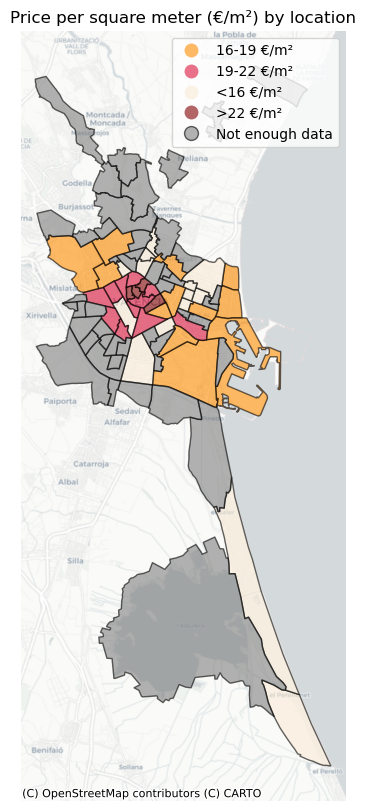

In [37]:
missing_kwds=dict(color='grey',label='Not enough data')
cmap = ListedColormap(['darkorange','crimson','antiquewhite','maroon'])
ax=gdf.plot(figsize=(5,10),column="Price_cat",cmap=cmap, edgecolor="k", legend=True,missing_kwds=missing_kwds,alpha=0.6)
ax.set_title('Price per square meter (€/m²) by location')
cx.add_basemap(ax,crs=gdf.crs,source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.savefig('map_price_range.png')